In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Project 4: Numerical Differentiation & Integration
You must complete each question and answer all parts. Read carefully. Some questions are meant to be exploratory and open-ended. Your submissions must be organized. If you are not using a jupyter notebook, you will have to include all required figures and reference the figures in your answers (e.g., "...see Figure 1 in attached file" with Figure 1 labeled in a separately attached file).


I expect a write up that demonstrates both how and why everything was done. All figures should be clearly labeled with axes labels, titles, and legends. Any code must be included. Any suspection of AI-generating or external code-writing tools will result in a meeting with me.

## Differentiation with data points
I've shamefully let my insurance company track my driving in hopes of a "safe driver" discount. They monitor three main things: (1) cell phone use, (2) speeding, and (3) hard braking—apparently top indicators of driving behavior.

Tracking (2) and (3) needs GPS data and some math. To detect speeding, they calculate velocity from position data (first derivatives). Hard braking, on the other hand, involves changes in velocity (second derivatives!).

I've provided a data file, `pakes_travel_log.csv`, with points from a typical 20-minute commute, recorded every 10 seconds. The following code will extract time and position from the file, but it requires the file to be in the **SAME directory as your code**. When grading, I'll specify the file location on my end.

In [2]:
import pandas as pd  # primary library for data management
import numpy as np

travel_data = pd.read_csv('pakes_travel_log.csv')  # read in data with pandas

time_vec = np.array( travel_data.time )            # extract time points from field 'time' 
                                                   #    // units are in hours
    
pos_vec  = np.array( travel_data.position )        # extract position (distance from home) from field 'position' 
                                                   #    // units are in miles

print(travel_data.head())                          # print first 5 data points

<ipython-input-2-e05d7ac26be2>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd  # primary library for data management


       time  position
0  0.000000  0.000000
1  0.002778  0.109223
2  0.005556  0.216414
3  0.008333  0.323974
4  0.011111  0.433597


### Question 1 (Graph my distance from home)
Create a graph that plots time vs. distance from home. How far away is work from home?

13.3315141668375


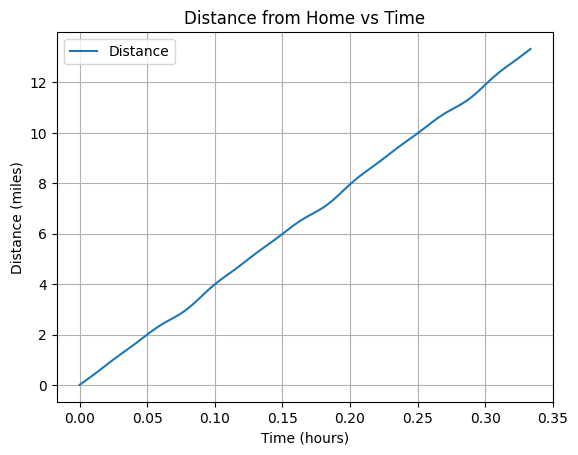

In [3]:
fig = plt.figure()
plt.plot(time_vec, pos_vec, label='Distance')
plt.xlabel('Time (hours)')
plt.ylabel('Distance (miles)')
plt.title('Distance from Home vs Time')
plt.grid()
plt.legend()
print(pos_vec[-1])

The last position value is 13.3, so work is about 13.3 miles away from home.

### Question 2 (Derivatives from data)
Create a function called `centered_diff_data(x,y)` that estimates the first derivative using *centered differences* with `x` as the independent variable and `y` as the dependent variable.

Why might we use centered differences, as opposed to forward or backward differences? At which data points can we use centered differences to approximate derivatives? How might we estimate a derivative at the other points?

In [4]:
def Centered_Diff_Data(x,y):             # x and y are arrays of values
    y_prime = np.zeros(np.shape(y)[0]-2)
    
    for i in range(np.shape(y)[0]-2):
        y_prime[i] = (y[i+2]-y[i]) / ( 2*(x[i+1]-x[i]) )  # y'(x) = (y(x+h)-y(x-h)) / 2h
    return y_prime

We would use centered differences to approximate the derivative because the error is $\mathcal{O}(h^2)$ whereas the error for forward and backward differences are both $\mathcal{O}(h)$, so our centered approximation is more accurate.

We can use centered differences at all except the first and last datapoints; we need information about either side of the derivative we want to approximate. 

We could estimate the derivatives of the endpoints by just using the forward or backward difference based off of which side we have information on.

### Question 3 (Second derivatives from data)
Create a function called `centerd_double_diff_data(x,y)` that estimates the second derivative with `x` as the independent variable and `y` as the dependent variable.

In [5]:
def Centerd_Double_Diff_Data(x,y):
    y_dprime = np.zeros(np.shape(y)[0]-2)
    
    for i in range(np.shape(y)[0]-2):
        y_dprime[i] = (y[i+2]-2*y[i+1]+y[i]) / (x[i+1]-x[i])**2   # y''(x) = (y(x+h) - 2y(x) + y(x-h)) / h^2
    return y_dprime

### Question 4 (Velocity plot)
Create a plot of time vs. velocity using `centered_diff_data()` to estimate velocities. 

I get dinged by insurance every time I drive 9 (or more) mph over the speed limit. If the speed limit is 40 mph during the whole drive, will I suffer any penalty due to speeding during this trip?

50.72211887450406


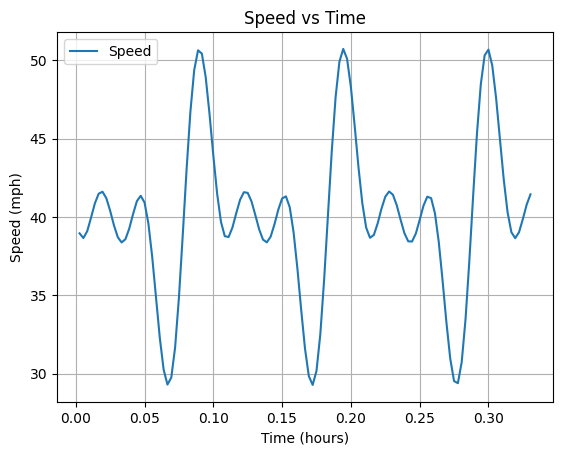

In [6]:
y_prime = Centered_Diff_Data(time_vec, pos_vec)
plt.plot(time_vec[1:-1], y_prime, label='Speed')
plt.title('Speed vs Time')
plt.xlabel('Time (hours)')
plt.ylabel('Speed (mph)')
plt.grid()
plt.legend()
print(y_prime.max())

Since your maximum speed is above 49 mph in multiple places in the graph, you would get a penalty for speeding.

### Question 5 (Acceleration plot)
Create a plot of time vs. acceleration using `centered_double_diff_data(x,y)`.

I get dinged for hard braking that results in about $0.35\,\text{g's}$. This comes out to an decceleration of around $2,860\,\text{mi}/\text{hr}^2$. Will I suffer any penalty due to hard braking during this trip?

-984.4701961791621


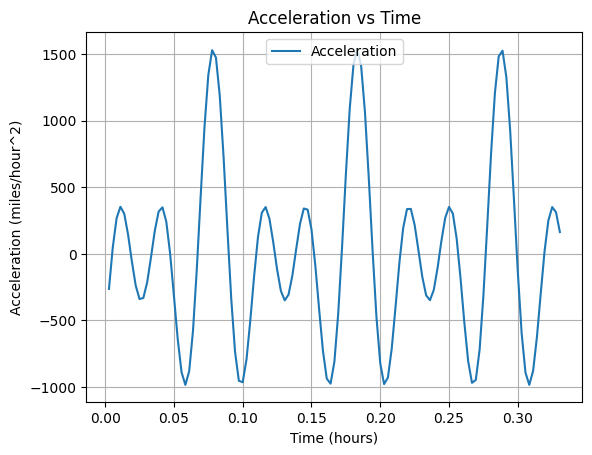

In [7]:
y_dprime = Centerd_Double_Diff_Data(time_vec, pos_vec)
plt.plot(time_vec[1:-1], y_dprime, label='Acceleration')
plt.title('Acceleration vs Time')
plt.xlabel('Time (hours)')
plt.ylabel('Acceleration (miles/hour^2)')
plt.grid()
plt.legend()
print(y_dprime.min())

Since the highest magnitude of decceleration is about $984 \, \text{mi}/\text{hr}^2$, you wouldn't suffer any penalty for hard braking.

### Question 6 (Something to consider)
All of our formulas (forward, backward, centered) for derivatives were based off a function $f(x)$. How is this problem different from those derivations?

Nonetheless, give a mathematical description of the difference of your centered difference estimates for velocity from the true value of velocity (which could be given by a speedometer, I guess, but is unknown in this problem). What prevents you from making a precise estimation of error?

### Solution

This problem is different because a function is never supplied to us, we're only working with empirical data.

Since position, speed, acceleration, and jerk are all continuous in this context, the error of the approximation will be $\mathcal{O}(h^2)$. 

The lack of an exact value prevents us from precisly estimating error, because otherwise we would already have an exact value. Precisely, the approximation error is $\frac{f'''(\xi)}{6}*h^2$ where $\xi\in[x-h,x+h]$ and likely depends on $x$. We don't want to and/or can't calculate $f'''(\xi)$ especially if we don't have a function, so the next best thing is taking the maximum value on the interval. This is where the precision is lost.

## Numerical integration error estimates
For this problem we will use the test problem
\begin{equation}
\int_{0}^{1} e^{-x}\,\mathrm{d}x
\end{equation}

### Question 1 (Quadrature methods)
Create the functions `left_riemann_sum()` and `right_riemann_sum()` that estimate an integral for a function $f(x)$ over an interval $[a,b]$ with $N$ subintervals, using left and right-riemann sums, respectively.

Create the functions `trapezoid_rule()` and `midpoint_rule()` that estimates the same integral using the trapezoidal and midpoint rule, respectively

Create the function `simpsons_method()` that implements Simpson's method with $N$ subintervals, where $N$ is even.

In [2]:
def Left_Riemann_Sum(function, a, b, inters):
    x = np.linspace(a, b, inters+1)
    coeffs = np.ones(inters+1)
    coeffs[inters]=0
    return (b-a)/inters*(np.sum(coeffs*function(x)))

def Right_Riemann_Sum(function, a, b, inters):
    x = np.linspace(a, b, inters+1)
    coeffs = np.ones(inters+1)
    coeffs[0]=0
    return (b-a)/inters*(np.sum(coeffs*function(x)))

def Trapezoid_Rule(function, a, b, inters):
    x = np.linspace(a, b, inters+1)
    coeffs = [2 for i in range(inters+1)]
    coeffs[0]=1
    coeffs[inters]=1
    return (b-a)/inters*np.sum(coeffs*function(x))/2

def Midpoint_Rule(function, a, b, inters):
    x = np.linspace(a, b, inters+1)
    x = np.array([(x[i]+x[i+1])/2 for i in range(np.shape(x)[0]-1)])
    coeffs = np.ones(inters)
    return (b-a)/inters*(np.sum(coeffs*function(x)))

def Simpsons_Method(function,a,b,inters):
    x = np.linspace(a, b, inters+1)
    coeffs = [1]+([4 if i%2 == 0 else 2 for i in range(0,inters-1)])+[1]
    return (b-a)/(3*inters)*np.sum(coeffs*function(x))

### Question 2 (Comparison of Riemann sums)
Use `left_riemann_sum` and `right_riemann_sum` to estimate the test integral using $N=10,100,1000,10000$ subintervals. Create a single log-log plot that shows the errors for each $N$ and their theoretical upper bounds.

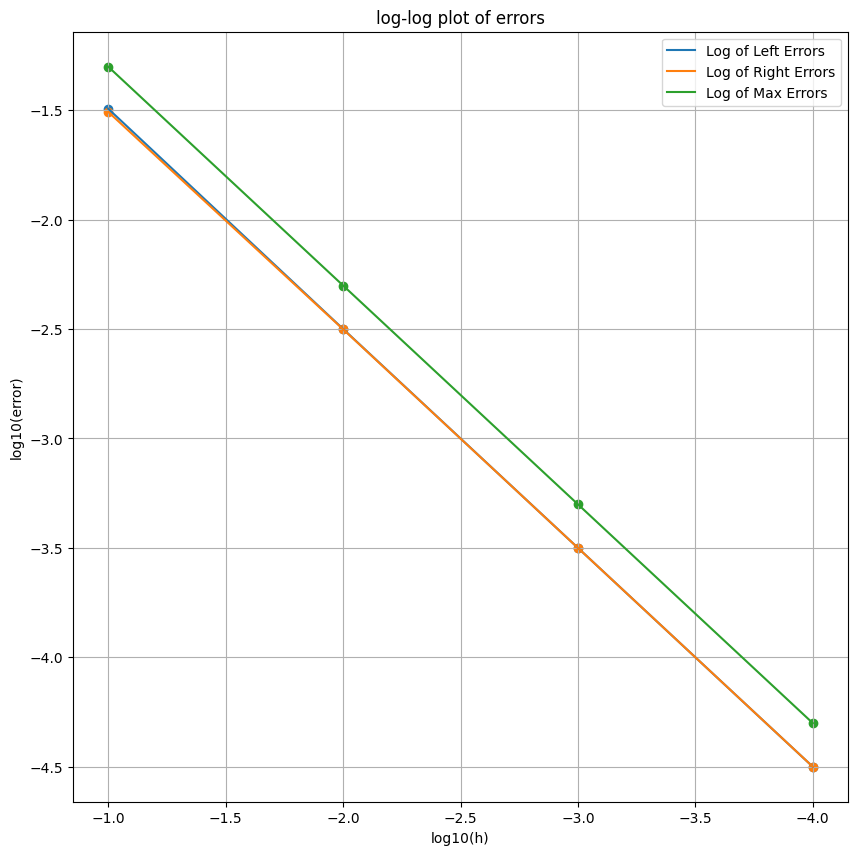

In [59]:
f = lambda x: np.exp(-x)
N = [10**i for i in range(1,5)]

Left_errs = np.zeros(4)
Right_errs = np.zeros(4)
Max_errs = np.zeros(4)
h_val = np.zeros(4)
sol = (np.exp(1) - 1) / np.exp(1)

for i in range(4):
    Left_errs[i] = abs(sol-Left_Riemann_Sum(f,0,1,N[i]))
    Right_errs[i] = abs(sol-Right_Riemann_Sum(f,0,1,N[i]))
    Max_errs[i] = (1) / (2*N[i])*(1-0) #  M / (2N) * (b-a)
    h_val[i] = 1 / N[i]


log_Left = np.log10(Left_errs)
log_Right = np.log10(Right_errs)
log_Max = np.log10(Max_errs)
log_h = np.log10(h_val)

fig, plot = plt.subplots(figsize=(10,10))

plt.scatter(log_h, log_Left)
plt.plot(log_h, log_Left,label='Log of Left Errors')
plt.scatter(log_h, log_Right)
plt.plot(log_h, log_Right,label='Log of Right Errors')
plt.scatter(log_h, log_Max)
plt.plot(log_h, log_Max,label='Log of Max Errors')


plot.invert_xaxis()
plt.xlabel('log10(h)')
plt.ylabel('log10(error)')
plt.title('log-log plot of errors')
plt.grid()
plt.legend()

### Question 3 (Order 2 methods)
Use `trapezoid_rule()` and `midpoint_rule()` to estimate the test integral using $N=10,100,1000,10000$ subintervals. Create a single log-log plot that shows the errors for each $N$ and their theoretical upper bounds.

Based on this test problem, and in terms of accuracy, would you rather use the trapezoid method or the midpoint method?

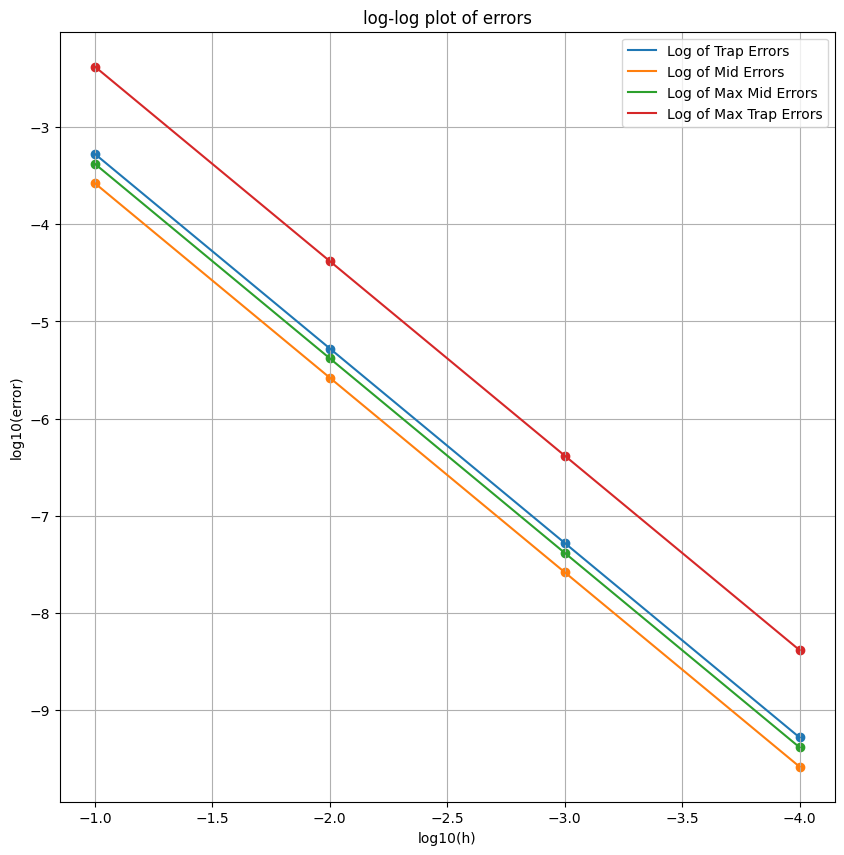

In [60]:
f = lambda x: np.exp(-x)
N = [10**i for i in range(1,5)]

Trap_errs = np.zeros(4)
Mid_errs = np.zeros(4)
Max_errs_Trap = np.zeros(4)
Max_errs_Mid = np.zeros(4)
h_vals = np.zeros(4)
sol = (np.exp(1) - 1) / np.exp(1)

for i in range(4):
    Trap_errs[i] = abs(sol-Trapezoid_Rule(f,0,1,N[i]))
    Mid_errs[i] = abs(sol-Midpoint_Rule(f,0,1,N[i]))
    
    Max_errs_Mid[i] = (1)/(24*N[i]**2) * (1) #  M / (24*N^2) * (b-a)^3 where M is max|f''| on [0,1]
    
    Max_errs_Trap[i] = 5*(1)/(12*(N[i]**2))*(1)  #  5*M / 12*(N^2) * (b-a)^3 where M is max|f''| on [0,1]
    h_vals[i] = 1 / N[i] 


log_Trap = np.log10(Trap_errs)
log_Mid = np.log10(Mid_errs)

log_Max_Trap = np.log10(Max_errs_Trap)
log_Max_Mid = np.log10(Max_errs_Mid)

log_h = np.log10(h_vals)


fig, plot = plt.subplots(figsize=(10,10))
plt.scatter(log_h, log_Trap)
plt.plot(log_h, log_Trap,label='Log of Trap Errors')
plt.scatter(log_h, log_Mid)
plt.plot(log_h, log_Mid,label='Log of Mid Errors')
plt.scatter(log_h, log_Max_Mid)
plt.plot(log_h, log_Max_Mid,label='Log of Max Mid Errors')
plt.scatter(log_h, log_Max_Trap)
plt.plot(log_h, log_Max_Trap,label='Log of Max Trap Errors')


plot.invert_xaxis()
plt.xlabel('log10(h)')
plt.ylabel('log10(error)')
plt.title('log-log plot of errors')
plt.grid()
plt.legend()

## Estimating digits of $\pi$
A hot-topic in math pop-culture is estimating digits of $\pi$. The trick is to do this using methods that do not require the actual value of $\pi$. One way to estimate $\pi$ is with the integral,
\begin{equation}
\int_{0}^{1} \frac{4}{1+x^2}\,\mathrm{d}x = \pi
\end{equation}
For this problem, you can freely use that 
\begin{equation}
\max_{x\in[0,1]} \left\lvert f^{'}(x)\right\rvert \approx 2.6, \quad
\max_{x\in[0,1]} \left\lvert f^{(4)}(x)\right\rvert = 96,
\end{equation}
where $f(x) = 1 / (1+x^2)$.

### Question 1 (Error bounds to decimals)
Explain why an error of no more than $0.01$ in estimating the integral above ensures that the first decimal place of $\pi$ is correct.

### Solution

An error of no more than 0.01 ensures the first decimal is correct because the first few decimals of $\pi$ are 3.14. If our estimate is above by 0.01, we have 3.15. If our estimate is below by 0.01, we have 3.13. In both cases the first two decimals are still 3.1, so they are still correct.

### Question 2 (How many subintervals)
How many subintervals are required to guarantee the first 8 decimals of $\pi$ are correct, if the integral is estimated with a left-riemann sum? How many subintervals are required if Simpson's method is used?

### Solution

Using left-riemann sum, the maximum error for this integral is $\frac{M}{2N}(b-a) \approx \frac{2.6}{2*N}(1-0)$.

$\implies 10^{-9} = \frac{2.6}{2*N} \implies N=1.3*10^9$.

Using Simpson's method, the maximum error is 
$\frac{M}{180N^4}(b-a)^5 = \frac{96}{180N^4}$.

$\implies 10^{-9} = \frac{96}{180N^4} \implies N = \sqrt[4]{\frac{96*10^9}{180}} \approx 152$

### Question 3 (Check it with Simpson)
Perform Simpson's method with the number of subintervals as found in the previous problem. Do you have the first 8 digits correct?

In [3]:
f = lambda x: 4 / (1 + x**2)

pi_approx = Simpsons_Method(f,0,1,152)
print(np.pi-pi_approx)

3.552713678800501e-15


I do have the first 8 digits correct, in fact there's much more accuracy than that. This is due to the maximum of $f^{(4)}(x)$ being much larger than the rest of the values on $x\in[0,1]$.

## Reading a paper
Read the paper 'TaisModel.pdf' on Canvas. This paper illustrates a few things, which I try to emphasize in the ensuing questions.

### Question 1
What is the goal of the paper? How does it relate to numerical integration?

### Answer

The goal of the paper is to develop a model for finding the area under curves from metabolic studies. Numerical integration seeks to do exactly the same thing, calculate area under curves.

### Question 2
The out-of-line formula ('Tai's Formula') should look familiar. What is another term for Tai's Formula? With this in mind, provide a critique of this paper.

### Answer

Tai's formula is the same as the Trapezoid method for numerical integration. It seems odd to name this method after yourself when the underlying math is relatively simple. The actual bound of the error isn't even calculated analytically.

### Question 3
How do they verify the efficacy of Tai's method? Why is this a bad way to verify their method?

### Answer

Tai's model is verified by finding a few specific test problems and applying the method to them, while comparing the result to other methods. Maybe this is okay as complementary material for verification, but every test is different. There's no generality in the verification which is very bad practice. There's so much math going on in the background that isn't mentioned in this report that could verify the method, but it is left out for some reason.

### Question 4
In the acknowledgments, the author thanks Dr. R Kuc, who turns out to be a Yale Professor of electrical engineering. Do you think this professor has a strong understanding of numerical integration?

### Answer

This professor might have a good understanding of integration in general, but maybe not numerical integration. Electrical systems seem easier to model analytically than biological or metabolic systems. 

### **BONUS** A theoretical question, of course.
A function $f(x)$ is called $T$-periodic if $f(x+T) = f(x)$ for all $x$. Suppose we want to estimate the integral of a periodic function over two periods,
\begin{equation}
\int_{0}^{2T} f(x)\,\mathrm{d}x.
\end{equation}

### Question 1 (Some theory)
Which is preferable for accuracy: using Simpson's rule to estimate $\int_0^T f(x)\,\mathrm{d}x$ with $N$ intervals and doubling the result OR using Simpson's rule to estimate $\int_0^{2T}$ with $2N$ intervals?

Both approaches seem as though they will give the same result. If you use Simpson's method for the first period with 10 intervals and double it, it's the same as using Simpson's method on the first period with 10 intervals, and then using Simpson's method on the next interval with 10 intervals again. 

### Question 2 (Some verification)
Estimate the integral
\begin{equation}
\int_{0}^{4} e^{-\cos(\pi x)}\,\mathrm{d}x
\end{equation}
using each approach. This integral does not admit an exact value, but we will use the estimate of $5.06426351100802$ as the "true answer". Does your numerical result match your answer to the previous question?

In [123]:
f = lambda x: np.exp(-np.cos(np.pi*x))

M1 = 2*Simpsons_Method(f,0,2,10)
M2 = Simpsons_Method(f,0,4,20)
print(M1)
print(M2)

5.064987414959609
5.064987414959609


This seems to confirm my suspicion. Maybe there's a rounding error that's introduced which could make the different approachs differ by a hair, but they seem to both be identically accurate.